Data: Spontaneous spiking activity from a retinal neuron in culture, exposed to low-light and high-light environments.

In [1]:
# from pylab import * #IP: this is some deprecated stuff to support matlab-style plotting, not using it, using pyplot instead
import scipy.io as sc_io  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import gamma  

%matplotlib inline
#rcParams['figure.figsize']=(12,3)  # Change the default figure size

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
plt.rcParams.update({'font.size': 14})

### First example

In [ ]:
# data = sc_io.loadmat('08_spikes-1.mat')
# spikes_low = data['SpikesLow'][0]
# print('first spike time {}, last spike time {}'.format(spikes_low[0], spikes_low[-1])) # seconds

# isi_low = np.diff(spikes_low)

# # Fit a statistical model to the ISIs.
# bins = np.arange(0, .5, 0.001)           # Define 1 ms bins.
# n_low = len(isi_low)                      # Length of low-light condition.
# mu = isi_low.mean()                      # Mean of inverse Gaussian
# lbda = 1 / (1 / isi_low - 1 / mu).mean()    # ... and shape parameter
# model = (                                   # ... to create the model.
#     sqrt(lbda / 2 / pi / bins ** 3) * 
#     exp(-lbda * (bins - mu) ** 2 / 2 / mu ** 2 / bins) * 0.001
# )
# model[0] = 0                             # Numerator to 0 faster than denominator.

# subplot(121)                         # Plot the data and the model,
# counts, _ = histogram(isi_low, bins)  # Compute histogram,
# prob = counts / len(isi_low)             # ... convert to probability,
# bar(bins[:-1], prob, width=1e-3)     # ... and plot probability.
# plot(bins, model, 'b')                   # Plot the model.
# xlim([0, 0.2])                       # xlim from 0 to 200 ms.
# xlabel('ISI [s]')                        # Label the axes.
# ylabel('Probability')

# subplot(122)                         # Plot the KS plot
# FmodLow = cumsum(model[:-1])          # Define the model CDF,
# FempLow = cumsum(prob)                # ... and define empirical CDF,
# plot(FmodLow, FempLow)                   # ... plot model vs empirical CDF,
# plot([0, 1], arange(2) + 1.36 / sqrt(n_low),'k:')  # ... upper confidence bound,
# plot([0, 1], arange(2) - 1.36 / sqrt(n_low),'k:')  # ... lower confidence bound,
# axis([0, 1, 0, 1])                   # ... set the axes ranges,
# xlabel('Model CDF')                      # ... and label the axes.
# ylabel('Empirical CDF')
# show()

### Second example

#### Get data

In [5]:
rec_duration = 30 # seconds

data = sc_io.loadmat('08_spikes-1.mat')
print(data.keys())

spikes_low = data['SpikesLow'][0]
print('spikes low: n spikes {}, first spike time {}, last spike time {}'.format(spikes_low.shape, 
                                                                                spikes_low[0], 
                                                                                spikes_low[-1])) # seconds

spikes_high = data['SpikesHigh'][0]
print('spikes high: n spikes {}, first spike time {}, last spike time {}'.format(spikes_high.shape, 
                                                                                 spikes_high[0], 
                                                                                 spikes_high[-1])) # seconds

dict_keys(['__header__', '__version__', '__globals__', 'SpikesLow', 'SpikesHigh'])
spikes low: n spikes (750,), first spike time 0.03987216368367961, last spike time 29.991181729686687
spikes high: n spikes (969,), first spike time 0.022692354918114433, last spike time 29.97452411931471


#### Looking at raw data: FR and rasters

fr_low 25.0 Hz, fr_high 32.3 Hz


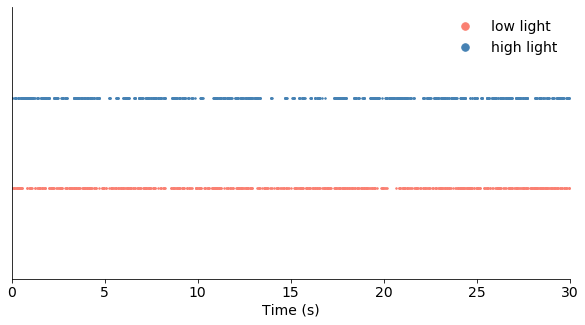

In [6]:
fr_low = len(spikes_low) / rec_duration
fr_high = len(spikes_high) / rec_duration

print('fr_low {} Hz, fr_high {} Hz'.format(fr_low, fr_high))

fig, axes = plt.subplots(1,1, figsize=(10,5))

axes.plot(spikes_low, np.ones_like(spikes_low), '.', markersize=3, c='salmon', label='low light')  # Plot spikes as a row,
axes.plot(spikes_high, 2 * np.ones_like(spikes_high), '.', markersize=3, c='steelblue', label='high light')
axes.set_xlim([0, 30]) 
axes.set_ylim([0, 3])
axes.set_xlabel('Time (s)')                         
axes.set_yticks([])                                 
axes.legend(markerscale=5, frameon=False)

sns.despine()

#### Transforning data: ISI

In [7]:
isi_low = np.diff(spikes_low)
isi_high = np.diff(spikes_high)

print('isi_low min {}, max {}'.format(np.min(isi_low), np.max(isi_low)))
print('isi_high min {}, max {}'.format(np.min(isi_high), np.max(isi_high)))

isi_low min 0.004008969087507808, max 0.4751211950316119
isi_high min 0.0007567472736269565, max 0.6857339195616614


In [15]:
np.max([np.max(isi_low), np.max(isi_high)])

0.6857339195616614

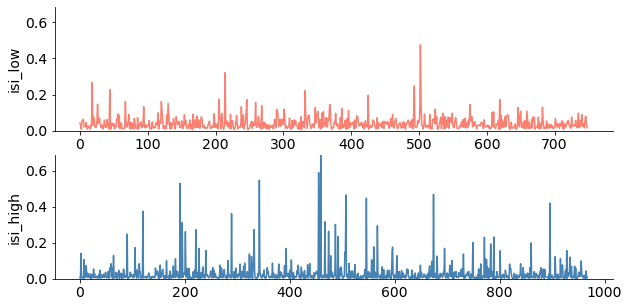

In [17]:
fig, axes = plt.subplots(2,1, figsize=(10,5))

axes[0].plot(isi_low, c='salmon', label='low light')  
axes[1].plot(isi_high, c='steelblue', label='high light')

axes[0].set_xlabel('Time (s)')                                                        
axes[0].set_ylabel('isi_low')  
axes[1].set_ylabel('isi_high')

for ax in axes.flat:
    ax.set_ylim([0, np.max([np.max(isi_low), np.max(isi_high)])])
    
sns.despine()

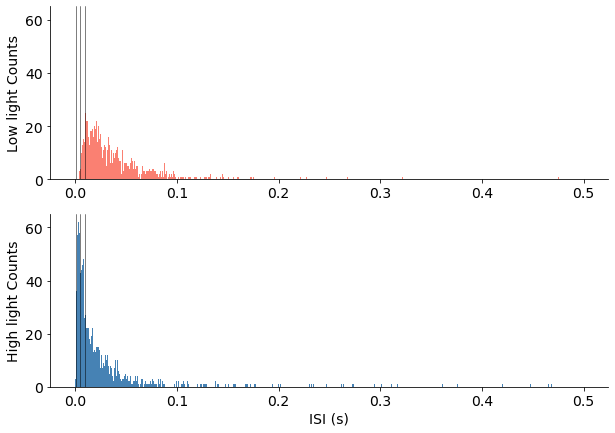

In [21]:
fig, axes = plt.subplots(2,1, figsize=(10,7), sharey=True)

bins = np.arange(0, 0.5, 0.001) # 1 ms bins

axes[0].hist(isi_low, bins, color='salmon')  
axes[1].hist(isi_high, bins, color='steelblue')

axes[1].set_xlabel('ISI (s)')                                                        
axes[0].set_ylabel('Low light Counts')  
axes[1].set_ylabel('High light Counts')

for ax in axes.flat:
    ax.axvline(x=0.005, c='k', lw=0.5)
    ax.axvline(x=0.001, c='k', lw=0.5)
    ax.axvline(x=0.01, c='k', lw=0.5)
    #axes[0].set_xlim([0,0.15])

sns.despine()

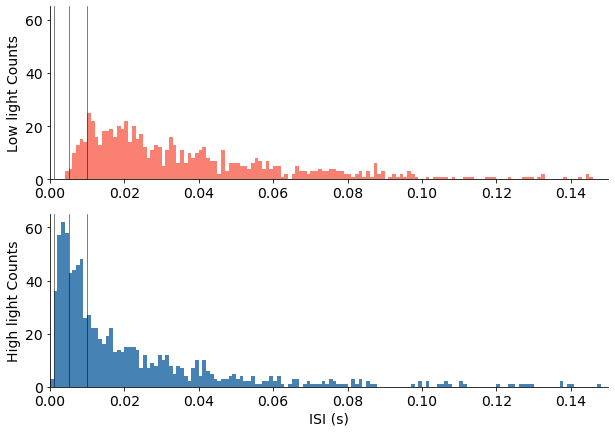

In [22]:
fig, axes = plt.subplots(2,1, figsize=(10,7), sharey=True)

bins = np.arange(0, 0.5, 0.001) # 1 ms bins

axes[0].hist(isi_low, bins, color='salmon')  
axes[1].hist(isi_high, bins, color='steelblue')

axes[1].set_xlabel('ISI (s)')                                                        
axes[0].set_ylabel('Low light Counts')  
axes[1].set_ylabel('High light Counts')

for ax in axes.flat:
    ax.axvline(x=0.005, c='k', lw=0.5)
    ax.axvline(x=0.001, c='k', lw=0.5)
    ax.axvline(x=0.01, c='k', lw=0.5)
    ax.set_xlim([0,0.15])

sns.despine()

#### Transforming data: binning

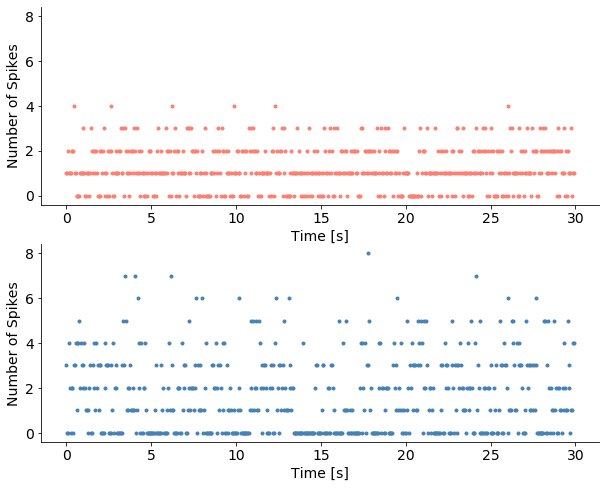

In [24]:
fig, axes = plt.subplots(2,1, figsize=(10,8), sharey=True)

time_bins = np.arange(0, 30, 0.05) # 50 ms            

increments_low50, _ = np.histogram(spikes_low, time_bins)  
axes[0].plot(time_bins[:-1], increments_low50, '.', color='salmon')   
               
increments_high50, _ = np.histogram(spikes_high, time_bins)  
axes[1].plot(time_bins[:-1], increments_high50, '.', color='steelblue')   

axes[0].set_xlabel('Time [s]')                                       
axes[0].set_ylabel('Number of Spikes')

axes[1].set_xlabel('Time [s]')                                       
axes[1].set_ylabel('Number of Spikes')

sns.despine()

#### Transforming data: binning + Fano factor

In [25]:
# Fano factor

# The theoretical Fano factor for a Poisson process is exactly equal to 1.
# If we compute a Fano factor well below the value 1 for a particular set of increments, 
# this suggests that the spiking is more regular than a Poisson process for the time scale 
# at which the increments were binned. In this case, spiking activity in the past is 
# influencing the neuron to spike in a more predictable manner in subsequent bins. 
# If we compute a Fano factor well above the value 1, this suggests that the spiking is 
# more variable than a Poisson process for the time scale at which the increments were binned.

ff_low50 = np.var(increments_low50) / np.mean(increments_low50)
print('ff_low50 {}'.format(ff_low50))

ff_high50 = np.var(increments_high50) / np.mean(increments_high50)
print('ff_high50 {}'.format(ff_high50))

ff_low50 0.7164927285225824
ff_high50 1.7786165348043843


conf_int_95 [0.88985257 1.11648138]


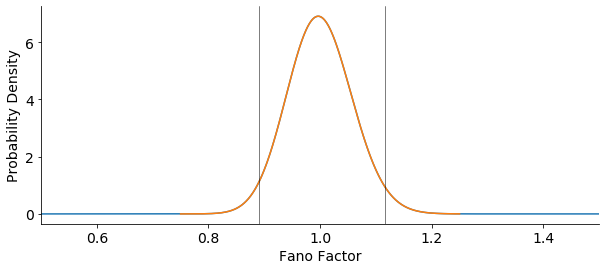

In [35]:
#  How far above or below the value of 1 does the calculated Fano factor have to be before we are 
# confident that there is really a statistically significant difference in the variability from a Poisson process? 

# Fortunately, a bit of statistical theory can help us out. It can be shown that the distribution of Fano factors 
# that we might compute from a Poisson process follows a gamma distribution with shape parameter (N−1)/2
# and scale parameter 2/(N−1), where N is the number of time bins used in the Fano factor calculation

n = increments_low50.shape[0];   # Determine number of time bins.
shape = (n - 1) / 2             # Define the shape parameter of the gamma function
scale = 2 / (n - 1)             # ... and the scale parameter 

ff_range = np.linspace(.5, 1.5, 1000) # Define possible FF values
gamma_distr = gamma.pdf(ff_range, shape, scale=scale)      # ... compute gamma distribution,
conf_int_95 = gamma.ppf([.025, .975], shape, scale=scale)
print('conf_int_95 {}'.format(conf_int_95))

ff_range2 = np.linspace(.75, 1.25, 1000) 
gamma_distr2 = gamma.pdf(ff_range2, shape, scale=scale)     


fig, axes = plt.subplots(1,1, figsize=(10,4))

axes.plot(ff_range, gamma_distr);   
axes.plot(ff_range2, gamma_distr2);  
axes.axvline(x=conf_int_95[0], c='k', lw=0.5)
axes.axvline(x=conf_int_95[1], c='k', lw=0.5)
axes.set_xlabel('Fano Factor')           
axes.set_ylabel('Probability Density') 
axes.set_xlim([0.5, 1.5])

sns.despine()

In [41]:
def get_ff(spike_train, rec_length, bin_size_l):
    
    ff_l, ci_l, n_bins_l = [],[],[]
    gamma_distr_l = []
    
    for bin_size in bin_size_l:
        time_bins = np.arange(0, rec_length, bin_size) 
        increments_, _ = np.histogram(spike_train, time_bins)  
        ff_ = np.var(increments_) / np.mean(increments_)
        n = increments_.shape[0];  
        shape = (n - 1) / 2            
        scale = 2 / (n - 1)             
        ff_range = np.linspace(.5, 1.5, 1000)
        gamma_distr = gamma.pdf(ff_range, shape, scale=scale)     
        conf_int_95 = gamma.ppf([.025, .975], shape, scale=scale)
        print('bin size {} s, n_bins {}, ff {}, ci 95% {}'.format(bin_size, n, ff_, conf_int_95))
        
        ff_l.append(ff_)
        ci_l.append(conf_int_95)
        n_bins_l.append(n)
        gamma_distr_l.append(gamma_distr)
        
    return ff_l, ci_l, n_bins_l, gamma_distr_l

In [63]:
bin_sizes = [0.025, 0.05, 0.075, 0.1, 0.5]
ff_l_low, ci_l_low, n_bins_l_low, gamma_distr_l_low = get_ff(spikes_low, 30, bin_sizes)
ff_l_high, ci_l_high, n_bins_l_high, gamma_distr_l_high = get_ff(spikes_high, 30, bin_sizes)

bin size 0.025 s, n_bins 1199, ff 0.7290879654614139, ci 95% [0.9215108  1.08165127]
bin size 0.05 s, n_bins 599, ff 0.7164927285225824, ci 95% [0.88985257 1.11648138]
bin size 0.075 s, n_bins 399, ff 0.7717285180823544, ci 95% [0.86588087 1.14363481]
bin size 0.1 s, n_bins 299, ff 0.7078302059967854, ci 95% [0.84588157 1.16682574]
bin size 0.5 s, n_bins 59, ff 0.8438289467640437, ci 95% [0.66971569 1.39544124]
bin size 0.025 s, n_bins 1199, ff 1.444664499397933, ci 95% [0.9215108  1.08165127]
bin size 0.05 s, n_bins 599, ff 1.7786165348043843, ci 95% [0.88985257 1.11648138]
bin size 0.075 s, n_bins 399, ff 1.9743925029966223, ci 95% [0.86588087 1.14363481]
bin size 0.1 s, n_bins 299, ff 2.2046461176895957, ci 95% [0.84588157 1.16682574]
bin size 0.5 s, n_bins 59, ff 3.2285534929602724, ci 95% [0.66971569 1.39544124]


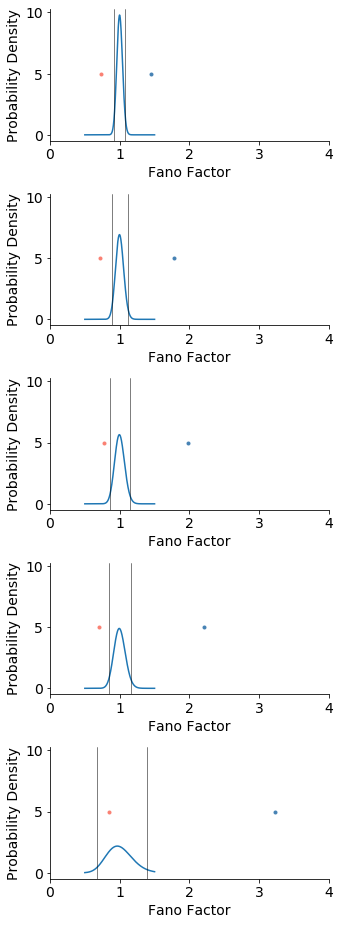

In [62]:
fig, axes = plt.subplots(5,1, figsize=(5,16), sharey=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

ff_range = np.linspace(.5, 1.5, 1000)
for i in range(5):
    axes[i].plot(ff_range, gamma_distr_l_low[i])
    axes[i].axvline(x=ci_l_low[i][0], c='k', lw=0.5)
    axes[i].axvline(x=ci_l_low[i][1], c='k', lw=0.5)
    axes[i].plot(ff_l_low[i], 5, '.', color='salmon')
    axes[i].plot(ff_l_high[i], 5, '.', color='steelblue')

for ax in axes.flat:
    ax.set_xlabel('Fano Factor')           
    ax.set_ylabel('Probability Density') 
    ax.set_xlim([0, 4])

sns.despine()

#### Transforming data: binning + Autocorrelation

In [64]:
# not sure that I understand that 
def autocorr(x, lags):
    xcorr = np.correlate(x - x.mean(), x - x.mean(), 'full')  # Compute the autocorrelation
#     print(xcorr.shape)
    # Within the function, we scale the raw autocorrelation so that we instead see correlation coefficients, 
    # which range from -1 to 1. 
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               # Convert to correlation coefficients
   # print(xcorr)
    return xcorr[:lags+1]                                     # Return only requested lags

In [85]:
# for 50ms bins
acf_low = autocorr(increments_low50, 19)
acf_high = autocorr(increments_high50, 19)
print(acf_low)
print(acf_high)

# How do we know whether these autocorrelation values are statistically significant?

# This can be a difficult question when N is small (less than 30), but for larger N
# we can approximate a confidence interval about the correlation coefficient using a normal 
# approximation with standard deviation 1/sqrt(N). In this case, any correlation value exceeding ±2/sqrt(N)
# is unlikely to be generated by chance and likely reflects real dependence structure. For the increment 
# process considered here, N=599, and the significance bound is ±0.08. We conclude that none of the 
# lags has significant autocorrelation.

(1197,)
(1197,)
[ 1.          0.03894992  0.07055464  0.04431669  0.00407988 -0.0146945
 -0.03160299 -0.07603572  0.01620583  0.09072608  0.01969736  0.03964259
  0.01153875 -0.00303971 -0.03720536 -0.03778495 -0.06215701 -0.06367421
  0.05702921  0.02425596]
[ 1.00000000e+00  2.40859746e-01  8.01339404e-02  4.69655399e-02
  9.78708766e-02  4.35242039e-02 -2.32703879e-02  8.19885626e-02
  6.55103429e-02  6.43532369e-02 -1.02330856e-02  5.12626995e-04
  3.21169361e-02 -1.82498227e-02  1.15714927e-02  6.82799464e-03
 -1.85849428e-03  4.83336450e-02 -2.25853864e-03  1.19793152e-02]


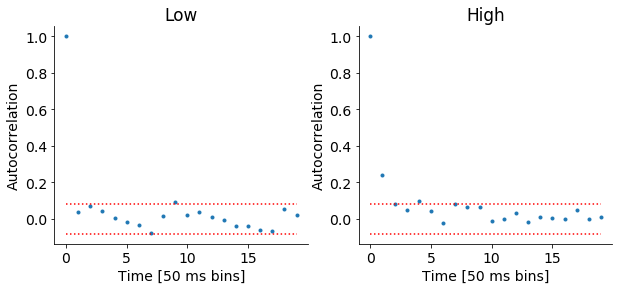

In [86]:
fig, axes = plt.subplots(1,2, figsize=(10, 4))

axes[0].plot(acf_low, '.')
sig_low = 2 / sqrt(len(increments_low50))  # compute and the significance level
axes[0].plot([0, 19], [sig_low, sig_low], 'r:')   # plot the upper and lower significance lines
axes[0].plot([0, 19], [-sig_low, -sig_low], 'r:')
axes[0].set_title('Low')

axes[1].plot(acf_high, '.')
sig_high = 2 / sqrt(len(increments_high50))  # compute and the significance level
axes[1].plot([0, 19], [sig_high, sig_high], 'r:')   # plot the upper and lower significance lines
axes[1].plot([0, 19], [-sig_high, -sig_high], 'r:')
axes[1].set_title('High')

for ax in axes.flat:
    ax.set_xlabel('Time [50 ms bins]')   
    ax.set_ylabel('Autocorrelation')

sns.despine()

##### 1 ms binning

In [93]:
time_bins_1ms = np.arange(0, 30, 0.001)                    
increments_low1, _ = np.histogram(spikes_low, time_bins_1ms) 
acf_low1ms = autocorr(increments_low1, 100)      
increments_high1, _ = np.histogram(spikes_high, time_bins_1ms) 
acf_high1ms = autocorr(increments_high1, 100)    

(59997,)
(59997,)


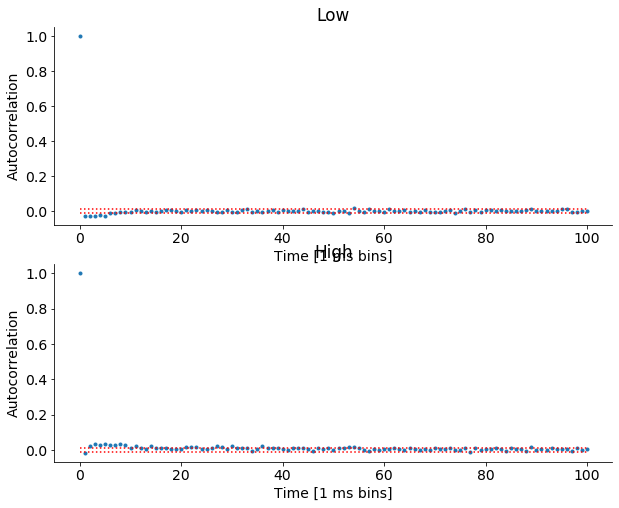

In [94]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))

axes[0].plot(acf_low1ms, '.')
sig_low = 2 / sqrt(len(increments_low1))  # compute and the significance level
axes[0].plot([0, 100], [sig_low, sig_low], 'r:')   # plot the upper and lower significance lines
axes[0].plot([0, 100], [-sig_low, -sig_low], 'r:')
axes[0].set_title('Low')

axes[1].plot(acf_high1ms, '.')
sig_high = 2 / sqrt(len(increments_high1))  # compute and the significance level
axes[1].plot([0, 100], [sig_high, sig_high], 'r:')   # plot the upper and lower significance lines
axes[1].plot([0, 100], [-sig_high, -sig_high], 'r:')
axes[1].set_title('High')

for ax in axes.flat:
    ax.set_xlabel('Time [1 ms bins]')   
    ax.set_ylabel('Autocorrelation')

sns.despine()

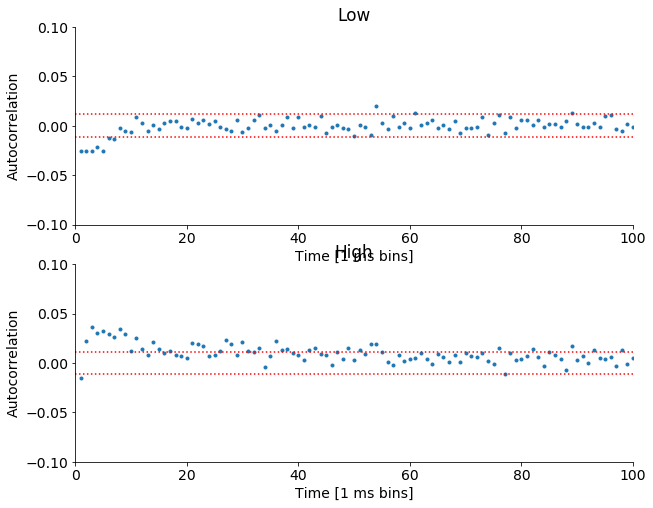

In [96]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))

axes[0].plot(acf_low1ms, '.')
sig_low = 2 / sqrt(len(increments_low1))  # compute and the significance level
axes[0].plot([0, 100], [sig_low, sig_low], 'r:')   # plot the upper and lower significance lines
axes[0].plot([0, 100], [-sig_low, -sig_low], 'r:')
axes[0].set_title('Low')

axes[1].plot(acf_high1ms, '.')
sig_high = 2 / sqrt(len(increments_high1))  # compute and the significance level
axes[1].plot([0, 100], [sig_high, sig_high], 'r:')   # plot the upper and lower significance lines
axes[1].plot([0, 100], [-sig_high, -sig_high], 'r:')
axes[1].set_title('High')

for ax in axes.flat:
    ax.set_xlabel('Time [1 ms bins]')   
    ax.set_ylabel('Autocorrelation')
    ax.set_xlim([0,100])
    ax.set_ylim([-.1, .1]) 

sns.despine()

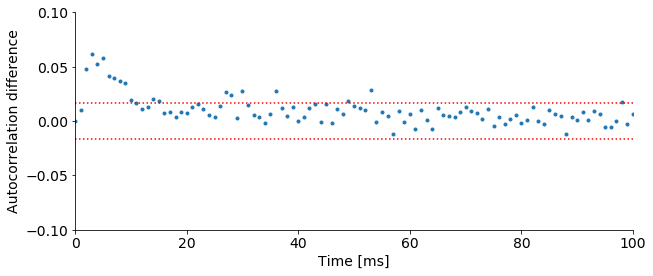

In [98]:
# differences between acf in high and low
# not sure about the confidence interval here

#N2 = len(IncrementsHigh1)
acf_diff = acf_high1ms - acf_low1ms   
sd = sqrt(1/len(increments_low1)+1/len(increments_high1))    

fig, axes = plt.subplots(1,1,figsize=(10,4))

axes.plot(acf_diff, '.')                           
axes.plot([0, 100], [2 * sd * x for x in [1, 1]], 'r:')
axes.plot([0, 100], [-2 * sd * x for x in [1, 1]], 'r:')
axes.set_xlim([0, 100])                           
axes.set_ylim([-.1, .1])
axes.set_xlabel('Time [ms]')
axes.set_ylabel('Autocorrelation difference')

sns.despine()


(1497,)


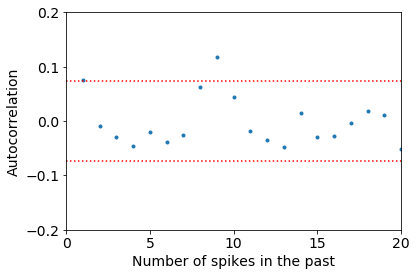

In [102]:
# this I don't get
ISI_ACF_Low = autocorr(isi_low, 20)  # Compute and plot the autocorrelation of the low-light ISIs,
plot(ISI_ACF_Low, '.')
N3 = len(isi_low)                    # ... with upper and lower significance lines.
sd = 1 / sqrt(N3)
plot(2 * sd * ones_like(ISI_ACF_Low), 'r:')
plot(-2 * sd * ones_like(ISI_ACF_Low), 'r:')
xlim([0, 20])                    # Set plot limits and label axes.
ylim([-.2, .2])
xlabel('Number of spikes in the past')
ylabel('Autocorrelation')
show()
